In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def perp(x, a):
    '''renvoie la probabilité de voisinage de j par rapport à i, pour tout i, j appartenant à x
    c'est à dire un matrice n*n avec n=len(x)'''
    
    if type(a).__module__ == np.__name__ :
        a = a.reshape(-1,1)
    x2 = x.reshape(list(x.shape) + [1])
    x = x.T
    return np.exp(np.linalg.norm(x - x2, 2, 1)/(-2*a*a)) / (np.sum(np.exp(np.linalg.norm(x - x2, 2, 1)/(-2*a*a)),0)-1)

In [3]:
def tSNE(x, dens, fc, d, t, r, a, verbose = False):
    '''x : n*i, matrice de points
    fc : fonction de calcul de proba
    d : dimension de sortie
    t : nb d'iterations
    r : learning rate
    a : t, momentum'''
    p = fc(x,dens)
    p = (p - p.T)/2*len(x)
    if verbose : print("p",p,p.shape)
    y = [np.random.normal(0,1e10-4, (x.shape[0],d)), np.random.normal(0,1e10-4, (x.shape[0],d))]
    for n in range(1,t+1):
        if verbose : print("iter",n)
        if verbose : print("y",y[n],y[n].shape)
        y1 = y[n]
        y2 = y1.reshape(list(y1.shape) + [1])
        y1 = y1.T
        q = np.reciprocal(1+np.linalg.norm( y1 - y2 ,2 ,1)) /\
        (np.sum( np.reciprocal(1 + np.linalg.norm( y1 - y2 , 2, 1)) ,0) - 1/y1.shape[0])
        if verbose : print("q",q,q.shape)
        l = []
        for i in range(y[n].shape[0]):
            t = np.zeros(d)
            for j in range(y[n].shape[0]):
                t += (p[i,j] - q[i,j] + p[j,i] - q[j,i]) * (y[n][i] - y[n][j])
            l.append(t*2)
        g = np.array(l)
        if verbose : print("g",g,g.shape)
        y.append(y[n] + r*g + a[n-1]*(y[n]-y[n-1]))
    return y[-1]

In [4]:
x = np.loadtxt("./swiss_roll.csv",delimiter=',')
x

array([[  1.54479005e-01,  -9.61997936e-01,   2.15353080e+00],
       [  1.25736895e+00,   4.65546580e-03,   9.81531098e+00],
       [  1.16346886e+00,   7.18096465e-01,   9.09599368e+00],
       ..., 
       [ -1.03463487e-01,   1.58048738e+00,   1.73614494e+00],
       [  6.64686603e-01,  -2.15884200e+00,   8.27572929e+00],
       [ -1.61903133e+00,   7.76322689e-01,   1.40747723e+00]])

In [16]:
d = 2
t = 50
r = 1e10-3
#a = np.linspace(1,1e10-3,t)
a = np.ones(t)
x2 = x[:500]

In [17]:
y = tSNE(x2, np.ones(x2.shape[0]), perp, d, t, r, a)

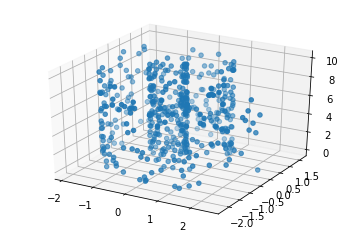

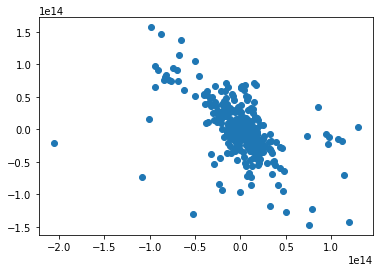

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2[:,0], x2[:,1], x2[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

Mon Tsne a l'air de fonctionner mais il est très lent.

In [15]:
from sklearn.manifold import TSNE

model = TSNE()

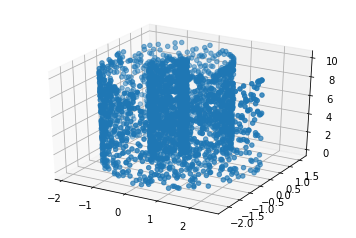

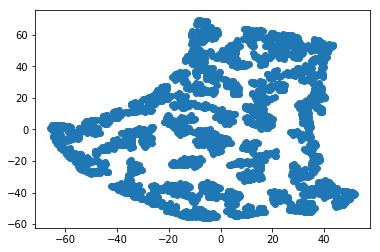

In [23]:
y = model.fit_transform(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

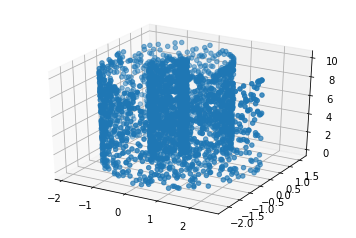

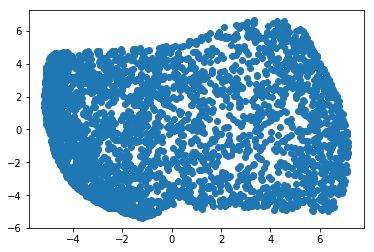

In [24]:
from sklearn.manifold import Isomap

model = Isomap(20, 2)
y = model.fit_transform(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

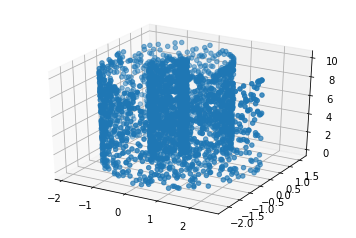

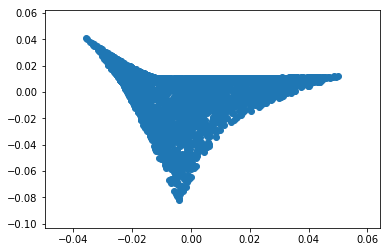

In [32]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(20,2)
y = model.fit_transform(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

In [ ]:
from sklearn.manifold import MDS

model = MDS()
y = model.fit_transform(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

Le MDS est trop long à process.

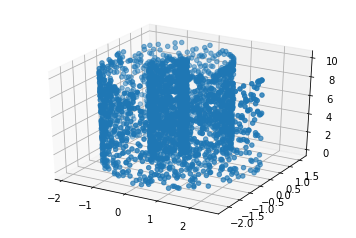

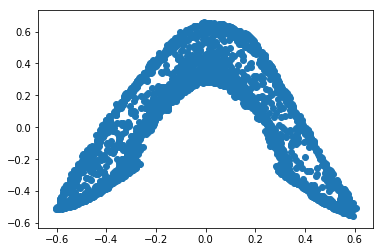

In [27]:
from sklearn.manifold import SpectralEmbedding

model = SpectralEmbedding()
y = model.fit_transform(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
plt.scatter(y[:,0], y[:,1])
plt.show()

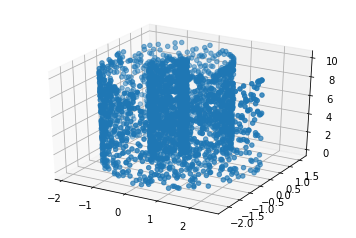

2


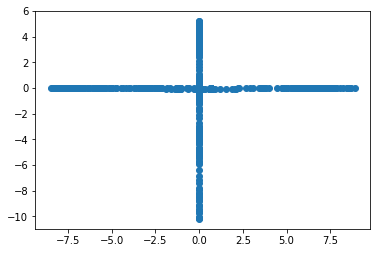

3


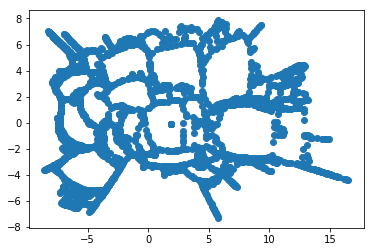

5


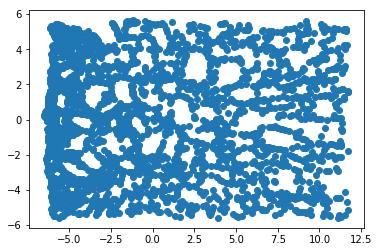

10


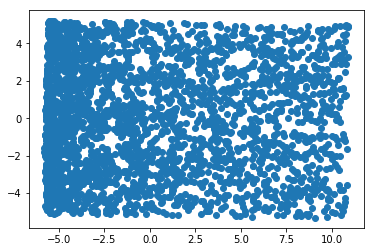

20


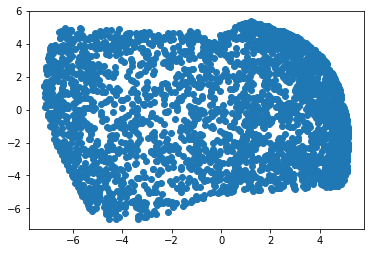

50


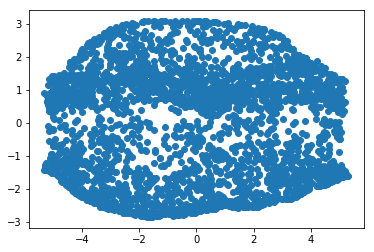

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
for i in [2,3,5,10,20,50]:
    model = Isomap(i, 2)
    y = model.fit_transform(x)
    print(i)
    plt.scatter(y[:,0], y[:,1])
    plt.show()

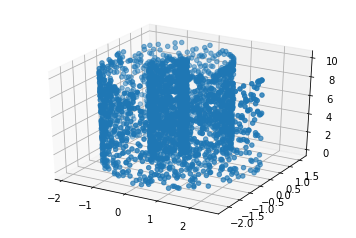

3


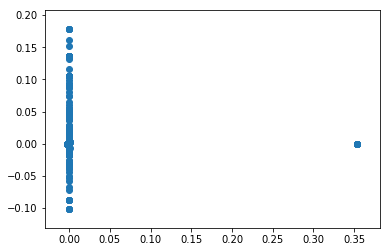

5


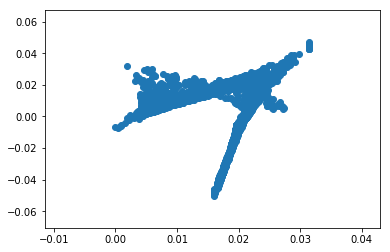

10


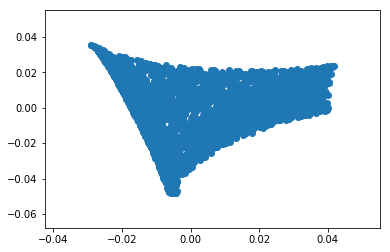

20


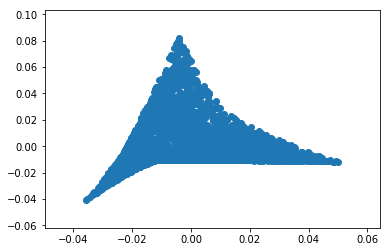

50


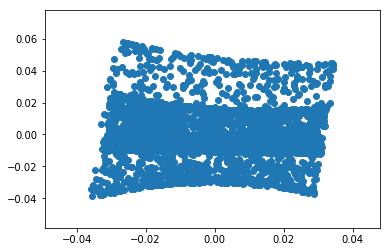

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])
plt.show()
for i in [3,5,10,20,50]:
    model = LocallyLinearEmbedding(i, 2)
    y = model.fit_transform(x)
    print(i)
    plt.scatter(y[:,0], y[:,1])
    plt.show()

In [46]:
mov = np.loadtxt("./mov20k.csv", int, delimiter='\t')
mov

array([[        1,         6,         5, 887431973],
       [        1,        10,         3, 875693118],
       [        1,        12,         5, 878542960],
       ..., 
       [      459,       934,         3, 879563639],
       [      460,        10,         3, 882912371],
       [      462,       682,         5, 886365231]])

In [47]:
mov = mov[:, :3]

In [48]:
mov

array([[  1,   6,   5],
       [  1,  10,   3],
       [  1,  12,   5],
       ..., 
       [459, 934,   3],
       [460,  10,   3],
       [462, 682,   5]])

In [49]:
nb1 = np.amax(mov[:,0])
nb2 = np.amax(mov[:,1])
print(nb1, nb2)

462 1591


In [61]:
x = np.ones((nb1+1,nb2+1))

In [62]:
x[mov[:,0], mov[:,1]] = 1/(mov[:,2]+1)

In [63]:
x[1,6]

0.16666666666666666

In [64]:
model = TSNE(metric='precomputed')
y = model.fit_transform(x)
plt.scatter(y[:,0], y[:,1])
plt.show()

ValueError: X should be a square distance matrix

Je vois pas comment me servir de la matrice pour faire le tSNE.